In [58]:
# daniel houli
# I wanted to cleanly show another model using the same iris dataset
# In order to do that I created a new file


#start a line with '!' to write to the command line instead. 
#This allows you to install packages to the EC2 instance from within jupyter
!pip install pandas
!pip install seaborn
!pip install sklearn
!pip install numpy


from sklearn.datasets import load_iris
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/usr/local/lib/python2.7/dist-packages/pip/commands/install.py", line 342, in run
    prefix=options.prefix_path,
  File "/usr/local/lib/python2.7/dist-packages/pip/req/req_set.py", line 784, in install
    **kwargs
  File "/usr/local/lib/python2.7/dist-packages/pip/req/req_install.py", line 851, in install
    self.move_wheel_files(self.source_dir, root=root, prefix=prefix)
  File "/usr/local/lib/python2.7/dist-packages/pip/req/req_install.py", line 1064, in move_wheel_files
    isolated=self.isolated,
  File "/usr/local/lib/python2.7/dist-packages/pip/wheel.py", line 345, in move_wheel_files
    clobber(source, lib_dir, True)
  File "/usr/local/lib/python2.7/dist-packages/pip/wheel.py", line 316, in clobber
    ensure_dir(destdir)
  File "/usr/local/lib/python2.7/dist-packages/pip/utils/__init__.py", line 83, 

In [59]:
#reference source http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
#reference http://python-guide-kr.readthedocs.io/ko/latest/scenarios/ml.html

#load our DF and name it df
df = datasets.load_diabetes()

# Select one feature
X = df.data[:, np.newaxis, 2]
y = df.target


print ('the number X: '+str(len(X)))
print ('the number Y: '+str(len(y)))

#set train and test data 20%
RANDOM_STATE=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM_STATE)

#checking the len
print ('the train X: '+str(len(X_train)))
print ('the test X: '+str(len(X_test)))



the number X: 442
the number Y: 442
the train X: 353
the test X: 89


In [60]:

#create our regression object
reg=linear_model.LinearRegression()
#train the model with fit
reg.fit(X_train, y_train)
#prediction with the test data
prediction = reg.predict(X_test)
#print out the prediction
print("Predictions:(first ten)", prediction[0:10])
#we can print out the coefficient and the mean squared error(in %)
print('---------------------------------------')
print("This is our coefficients: ", reg.coef_)
print('---------------------------------------')
print("MSE: %.3f" % mean_squared_error(y_test, prediction))
print('---------------------------------------')
#Display variance we know that 1 would be a perfect prediction(in %)
print('Variance: %.3f' % r2_score(y_test, prediction))

('Predictions:(first ten)', array([ 255.17426905,  211.79462571,  161.0087018 ,  129.26749936,
        196.98206457,  247.76798848,  123.97729895,  174.76322286,
        205.44638522,  198.04010465]))
---------------------------------------
('This is our coefficients: ', array([ 981.65543614]))
---------------------------------------
MSE: 4150.680
---------------------------------------
Variance: 0.191


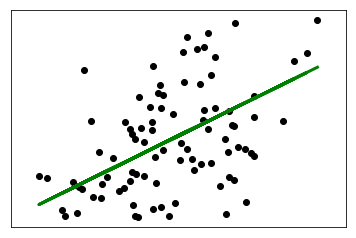

In [61]:
#put the data into a plot
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, prediction, color='green', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

In [64]:
#code to save your model to disk and then to s3
import pickle
local_path = "/home/ubuntu" # temp path to export your model
bucket_name = "mybucketdanhouli48" # s3 key to save your network to



# save the model to disk
filename = 'finalized_model_new.sav'
pickle.dump(reg, open(filename, 'wb'))
#you should now see your finalized_model.sav in the file path
#the ls command prints the contents of this notebook's root folder
!ls
 
# Upload to S3
#TO GET THIS WORKING, YOU MUST ASSIGN AN ADMIN ROLE TO YOUR EC2 INSTANCE
import boto3
s3 = boto3.resource('s3')
s3.Bucket(bucket_name).put_object(Key='finalized_model.sav', Body=open('finalized_model.sav'))

Assignment2_dhouli.ipynb
Boto_Rekognition_Commands_Artifact_v2.ipynb
finalized_model_new.sav
finalized_model.sav
intro_to_python_data_science_on_aws.ipynb


s3.Object(bucket_name='mybucketdanhouli48', key='finalized_model.sav')

In [ ]:
#copy file to my git directory
!cp /home/ubuntu/ADS_Class/Assignment2_dhouli.ipynb /home/ubuntu/git/
#then manually push from git dir